# Simple Reinforcement Learning with Tensorflow: Part 0 - Q-Networks

In this iPython notebook we implement a Q-Table algorithm that solves the FrozenLake problem using pyTorch. For more details see original tutorial containing tensorflow code on [Medium](https://medium.com/@awjuliani/simple-reinforcement-learning-with-tensorflow-part-0-q-learning-with-tables-and-neural-networks-d195264329d0).

In [9]:
%matplotlib inline
from __future__ import division

import gym
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

import torch

### Load the environment

In [4]:
env = gym.make('FrozenLake-v0')

## The Q-Network Approach

### Implementing the network itself

$$ Loss = \sum \left( Q_{next} - Q \right)^2 $$

### Training the network

In [5]:
# Initialize PyTorch
state_tensor = torch.zeros((1,16))
state_tensor_new = torch.zeros((1,16))
W = torch.tensor(torch.rand((16, 4)) * 0.01, requires_grad=True)
SGD = torch.optim.SGD([W], lr = 0.1)

# Set learning parameters
y = .99
e = 0.1
num_episodes = 20000
#create lists to contain total rewards and steps per episode
R = []
for i in range(num_episodes):
    # Reset environment and get first new observation
    state = env.reset()
    reward_sum = 0
    # The Q-Network
    while True:
        # Choose an action by greedily (with e chance of random action) from the Q-network
        Q = W[state].clone()
        Q_next = W[state].clone()
        # Make random action from time to time
        if np.random.rand(1) < e:
            action = env.action_space.sample()
        else:
            action = torch.argmax(Q).item()
        # Get new state and reward from environment
        state, reward, done, info = env.step(action)   
        # Obtain the Q' values by feeding the new state through our network
        max_value = torch.max(W[state]).item()
        Q_next[action] = reward + y * max_value
        # Gradient descent
        loss = torch.sum((Q_next - Q)**2)
        SGD.zero_grad()
        loss.backward()
        SGD.step()
        reward_sum += reward
        # Check if game is finished
        if done:
            # Reduce chance of random action as we train the model.
            e = 1./((i/50) + 10)
            break
    R.append(reward_sum)

## How score varies over time?

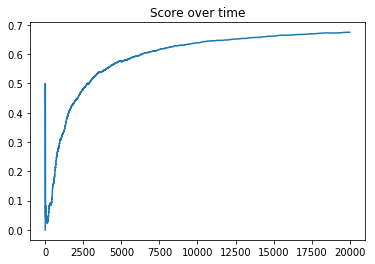

In [6]:
plt.plot(np.cumsum(R) / np.arange(1, num_episodes + 1))
plt.title('Score over time')
plt.show()

## Final Q-Table Values

In [11]:
# Final Q-Table Values
print(" 0 S  1 F  2 F  3 F\n 4 F  5 H  6 F  7 H\n 8 F  9 F 10 F 11 H\n12 H 13 F 14 F 15 G")
pd.DataFrame(W.detach().numpy(), columns=['left', 'down', 'right', 'up']).style.background_gradient(axis=1)

 0 S  1 F  2 F  3 F
 4 F  5 H  6 F  7 H
 8 F  9 F 10 F 11 H
12 H 13 F 14 F 15 G


,left,down,right,up
0,0.54505,0.485188,0.466503,0.487496
1,0.345129,0.21189,0.310342,0.477125
2,0.377384,0.375424,0.383391,0.469339
3,0.269726,0.329851,0.341055,0.452188
4,0.56597,0.271181,0.394729,0.479031
5,0.00434956,0.00537339,0.00354529,0.00158147
6,0.481373,0.0863325,0.135709,0.0664281
7,0.00828131,0.00643182,0.00164332,0.00985221
8,0.452321,0.216479,0.492013,0.594229
9,0.377447,0.676881,0.381942,0.398373


## Let's play a single game


In [7]:
state = env.reset()
env.render()
while True:
    action = torch.argmax(W[state]).item()
    state, reward, done, info = env.step(action)
    env.render()
    if done:
        break


SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Left)
